In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testx/cite_test_x.npy
/kaggle/input/open-problems-multimodal/sample_submission.csv
/kaggle/input/open-problems-multimodal/train_cite_targets.h5
/kaggle/input/open-problems-multimodal/metadata_cite_day_2_donor_27678.csv
/kaggle/input/open-problems-multimodal/test_multi_inputs.h5
/kaggle/input/open-problems-multimodal/evaluation_ids.csv
/kaggle/input/open-problems-multimodal/train_cite_inputs.h5
/kaggle/input/open-problems-multimodal/train_multi_targets.h5
/kaggle/input/open-problems-multimodal/train_multi_inputs.h5
/kaggle/input/open-problems-multimodal/metadata.csv
/kaggle/input/open-problems-multimodal/test_cite_inputs_day_2_donor_27678.h5
/kaggle/input/open-problems-multimodal/test_cite_inputs.h5
/kaggle/input/dataset/y_train.npy
/kaggle/input/dataset/y_test.npy
/kaggle/input/dataset/x_test.npy
/kaggle/input/dataset/x_train.npy
/kaggle/input/trainx/cite_train_x.npy


### Chromatin accessibility input and targets
multiome-->ATEC->Chromatin accesibility

In [ ]:
hdf = pd.HDFStore('/kaggle/input/open-problems-multimodal/train_multi_inputs.h5',
                  mode='r')
df_multi_input = hdf.get(hdf.keys()[0])
df_multi_input.head()

In [2]:
gc.collect()
hdf = pd.HDFStore('/kaggle/input/open-problems-multimodal/train_multi_targets.h5',
                  mode='r')
df_multi_output = hdf.get(hdf.keys()[0])
df_multi_output.head()

### Gene expressioninput and targets
CITESeq-->given RNA gene expression->Predict Protien levels

In [3]:
hdf = pd.HDFStore('/kaggle/input/open-problems-multimodal/train_cite_inputs.h5',
                  mode='r')
df_cite_input = hdf.get(hdf.keys()[0])
df_cite_input.head()

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [3]:
gc.collect()
hdf = pd.HDFStore('/kaggle/input/open-problems-multimodal/train_cite_targets.h5',
                  mode='r')
df_cite_output = hdf.get(hdf.keys()[0])
df_cite_output.head()

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445


In [4]:
df_cite_output.shape

(70988, 140)

In [5]:
df_sample_submission = pd.read_csv('/kaggle/input/open-problems-multimodal/sample_submission.csv')
df_sample_submission.head(3)

,row_id,target
0,0,0.0
1,1,0.0
2,2,0.0


In [6]:
df_sample_submission.shape

(65744180, 2)

In [6]:
df1 = pd.read_csv('/kaggle/input/open-problems-multimodal/metadata.csv')
df1.head()

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [7]:
df1.cell_type.unique()

array(['HSC', 'EryP', 'NeuP', 'MasP', 'MkP', 'BP', 'MoP', 'hidden'],
      dtype=object)

In [12]:
df_cell_cite = df1[df1.technology=="citeseq"]
df_cell_multi = df1[df1.technology=="multiome"]

In [13]:
df_cite_cell_dist = df_cell_cite.set_index("cell_id")[["day","donor"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})
df_cite_cell_dist

,day,donor,# cells
0,2,31800,8395
1,2,27678,7476
2,2,32606,7476
3,2,13176,6071
4,3,13176,7643
5,3,32606,6999
6,3,27678,6488
7,3,31800,6259
8,4,31800,10149
9,4,32606,9511


In [14]:
df_multi_cell_dist = df_cell_multi.set_index("cell_id")[["day","donor"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})
df_multi_cell_dist

,day,donor,# cells
0,2,13176,9558
1,2,27678,8921
2,2,32606,7264
3,2,31800,7089
4,3,31800,11306
5,3,13176,8965
6,3,32606,8544
7,3,27678,7950
8,4,32606,10933
9,4,31800,10794


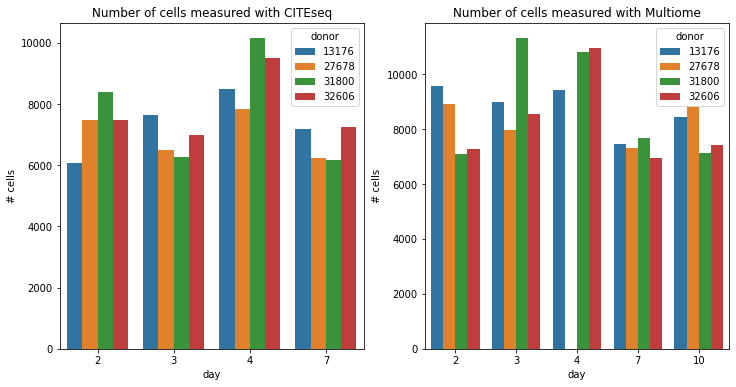

In [17]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.barplot(data=df_cite_cell_dist, x="day",hue="donor",y="# cells", ax=axs[0])
axs[0].set_title("Number of cells measured with CITEseq")


sns.barplot(data=df_multi_cell_dist, x="day",hue="donor",y="# cells", ax=axs[1])
axs[1].set_title("Number of cells measured with Multiome")
plt.show()

In [2]:
import os, gc, pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from colorama import Fore, Back, Style
from matplotlib.ticker import MaxNLocator
import warnings
warnings.simplefilter('ignore')
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error

In [6]:
DATA_DIR = "/kaggle/input/open-problems-multimodal/"
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")

FP_CITE_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
FP_CITE_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_cite_targets.h5")
FP_CITE_TEST_INPUTS = os.path.join(DATA_DIR,"test_cite_inputs.h5")

FP_MULTIOME_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_multi_inputs.h5")
FP_MULTIOME_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_multi_targets.h5")
FP_MULTIOME_TEST_INPUTS = os.path.join(DATA_DIR,"test_multi_inputs.h5")

FP_SUBMISSION = os.path.join(DATA_DIR,"sample_submission.csv")
FP_EVALUATION_IDS = os.path.join(DATA_DIR,"evaluation_ids.csv")

In [3]:
!pip install --quiet tables

In [4]:
df_cell = pd.read_csv(FP_CELL_METADATA)
df_cell_cite = df_cell[df_cell.technology=="citeseq"]
df_cell_multi = df_cell[df_cell.technology=="multiome"]
df_cell_cite.shape, df_cell_multi.shape

((119651, 5), (161877, 5))

In [ ]:
pd.read_hdf(FP_MULTIOME_TEST_INPUTS).values

In [ ]:
%%time
# Preprocessing
col_start = 10000

class PreprocessCiteseq(BaseEstimator, TransformerMixin):
    columns_to_use = 13000
    
    @staticmethod
    def take_column_subset(X):
        return X[:,-(PreprocessCiteseq.columns_to_use+col_start):-col_start]
    
    def transform(self, X):
        print('orignal shape', X.shape)
        X = X[:,~self.all_zero_columns]
        print('after removing zeros', X.shape)
        X = PreprocessCiteseq.take_column_subset(X) # use only a part of the columns
        print('after subsetting', X.shape)
        gc.collect()

        X = self.pca.transform(X)
        print('after PCA', X.shape)
        return X

    def fit_transform(self, X):
        gc.collect()
        print('orignal shape', X.shape)
        self.all_zero_columns = (X == 0).all(axis=0)
        X = X[:,~self.all_zero_columns]
        print('after removing zeros', X.shape)
        X = PreprocessCiteseq.take_column_subset(X) # use only a part of the columns
        print('after subsetting', X.shape)
        gc.collect()

        self.pca = PCA(n_components=240, copy=False, random_state=1)
        X = self.pca.fit_transform(X)
#         plt.plot(self.pca.explained_variance_ratio_.cumsum())
#         plt.title("Cumulative explained variance ratio")
#         plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
#         plt.xlabel('PCA component')
#         plt.ylabel('Cumulative explained variance ratio')
#         plt.show()
        print(X.shape)
        return X

gc.collect()
preprocessor = PreprocessCiteseq()

cite_train_x = None
cite_train_x = preprocessor.fit_transform(pd.read_hdf(FP_MULTIOME_TEST_INPUTS).values)

cite_train_y = pd.read_hdf(FP_CITE_TRAIN_TARGETS).values
print(cite_train_y.shape)

In [ ]:
params = {
     'learning_rate': 0.1, 
     'metric': 'mae', 
     "seed": 42,
    'reg_alpha': 0.0014, 
    'reg_lambda': 0.2, 
    'colsample_bytree': 0.8, 
    'subsample': 0.5, 
    'max_depth': 10, 
    'num_leaves': 722, 
    'min_child_samples': 83, 
    }

model = MultiOutputRegressor(lgb.LGBMRegressor(**params, n_estimators=1000))

model.fit(cite_train_x, cite_train_y)

y_va_pred = model.predict(cite_train_x)
mse = mean_squared_error(cite_train_y, y_va_pred)
print(mse)
del cite_train_x, cite_train_y
gc.collect()

In [3]:
import os, gc, pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from colorama import Fore, Back, Style
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

DATA_DIR = "/kaggle/input/open-problems-multimodal/"
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")

FP_CITE_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
FP_CITE_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_cite_targets.h5")
FP_CITE_TEST_INPUTS = os.path.join(DATA_DIR,"test_cite_inputs.h5")

FP_MULTIOME_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_multi_inputs.h5")
FP_MULTIOME_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_multi_targets.h5")
FP_MULTIOME_TEST_INPUTS = os.path.join(DATA_DIR,"test_multi_inputs.h5")

FP_SUBMISSION = os.path.join(DATA_DIR,"sample_submission.csv")
FP_EVALUATION_IDS = os.path.join(DATA_DIR,"evaluation_ids.csv")

cuda


In [5]:
cite_train_x = np.load("/kaggle/input/trainx/cite_train_x.npy")
print(cite_train_x.shape)


cite_train_y = pd.read_hdf(FP_CITE_TRAIN_TARGETS).values
print(cite_train_y.shape)

(70988, 240)
(70988, 140)


RNA to protien encoder decoder

In [4]:
class CFG:
    tr_batch_size = 16 # 16
    va_batch_size = 128 # 32
    
    optimizer = "AdamW"
    lr = 1e-5
    weight_decay = 0.1
    betas = (0.9, 0.999)
    epochs = 15
    

In [5]:
class CtieseqDataset(Dataset):
    """
    Train, Validation or Test dataset for CITEseq samples
    Prepares data for simple vector to vector NN
    """
    def __init__(self, X, y=None):
        self.train = False 
        if y is not None:
            self.train = True
        self.X = X
        self.y = y
            
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        X = self.X[idx]
        
        if self.train:
            y = self.y[idx]
            return {
                "X" : torch.tensor(X).to(device),
                "y" : torch.tensor(y).to(device)
            }
        else:
            return {
                "X" : torch.tensor(X).to(device)
            }

In [17]:
def criterion(outputs, labels):
    """ MSE Loss function"""
    return nn.MSELoss()(outputs, labels)

def correlation_score(y_true, y_pred):
    """
    Scores the predictions according to the competition rules. 
    It is assumed that the predictions are not constant.
    Returns the average of each sample's Pearson correlation coefficient
    """
    
    if type(y_true) == pd.DataFrame: y_true = y_true.values
    if type(y_pred) == pd.DataFrame: y_pred = y_pred.values
    corrsum = 0
    for i in range(len(y_true)):
        corrsum += np.corrcoef(y_true[i], y_pred[i])[1, 0]
    return corrsum / len(y_true)

def get_optimizer(model, lr, weight_decay, betas):
    """ Gets AdamW optimizer """
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(
            nd in n for nd in no_decay)], 'weight_decay': weight_decay},
        {'params': [p for n, p in param_optimizer if any(
            nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]
    optimizer = AdamW(optimizer_grouped_parameters,
                      lr=lr,
                      weight_decay=weight_decay,
                      betas=betas,
                     )
    return optimizer

def get_scheduler(optimizer, T_max=300):
    """ Gets Consine scheduler """
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,
                                                           T_max=T_max)
    return scheduler

In [18]:
class FCBlock(nn.Module):
    """
    A Pytorch Block for a fully connected Layer
    Includes Linear, Activation Function, and Dropout
    """
    def __init__(self, input_dim, hidden_dim, dropout):
        super().__init__()
        self.fc = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = self.fc(x)
        x = F.selu(x)
        x = self.dropout(x)
        return x

class Encoder(nn.Module):
    """
    Encoder module to generate embeddings of a RNA vector
    """
    def __init__(self):
        super().__init__()
        self.l0 = FCBlock(240, 120, 0.05)
        self.l1 = FCBlock(120, 60, 0.05)
        self.l2 = FCBlock(60, 30, 0.05)
        
    def forward(self, x):
        x = self.l0(x)
        x = self.l1(x)
        x = self.l2(x)
        return x
    
class Decoder(nn.Module):
    """
    Decoder module to extract Protein sequences from RNA embeddings
    """
    def __init__(self):
        super().__init__()
        self.l0 = FCBlock(30, 70, 0.05)
        self.l1 = FCBlock(70, 100, 0.05)
        self.l2 = FCBlock(100, 140, 0.05)
        
    def forward(self, x):
        x = self.l0(x)
        x = self.l1(x)
        x = self.l2(x)
        return x
    
class CtieseqModel(nn.Module):
    """
    Wrapper for the Encoder and Decoder modules
    Converts RNA sequence to Protein sequence
    """
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def forward(self, x):
        embeddings = self.encoder(x)
        outputs = self.decoder(embeddings)
        return outputs

In [19]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [20]:
def train_one_epoch(model, optimizer, scheduler, dataloader, device, epoch):
    """ Trains one epoch and returns loss """
    model.train()
    
    losses = AverageMeter()
    corr = AverageMeter()
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:
        X, y = data["X"], data["y"]
        
        batch_size = X.size(0)

        outputs = model(X)

        n = outputs.size(0)
        loss = criterion(outputs, y)
        losses.update(loss.item(), n)
        loss.backward()
        
        outputs = outputs.detach().cpu().numpy()
        y = y.detach().cpu().numpy()
        corr_score = correlation_score(y, outputs)
        corr.update(corr_score, n)
        
        optimizer.step()
        optimizer.zero_grad()

        if scheduler is not None:
            scheduler.step()
        
        bar.set_postfix(Epoch=epoch, Train_Loss=losses.avg, Corr=corr.avg,
                        LR=optimizer.param_groups[0]['lr'])
    gc.collect()
    
    return losses.avg

In [21]:
@torch.no_grad()
def valid_one_epoch(model, optimizer, dataloader, device, epoch):
    """ Evaluates one epoch and returns loss """
    model.eval()
    
    losses = AverageMeter()
    corr = AverageMeter()
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:        
        X, y = data["X"], data["y"]
        
        batch_size = X.size(0)

        outputs = model(X)
        
        n = outputs.size(0)
        loss = criterion(outputs, y)
        losses.update(loss.item(), n)
        
        outputs = outputs.detach().cpu().numpy()
        y = y.detach().cpu().numpy()
        corr_score = correlation_score(y, outputs)
        corr.update(corr_score, n)
        
        bar.set_postfix(Epoch=epoch, Valid_Loss=losses.avg, Corr=corr.avg,
                        LR=optimizer.param_groups[0]['lr'])   
    
    gc.collect()
    
    return losses.avg

In [22]:
def train_one_fold(model, 
                   optimizer, 
                   scheduler, 
                   train_loader, 
                   valid_loader, 
                   fold):
    """ Trains and saves a full fold of a pytorch model """
    best_epoch_loss = np.inf
    model.to(device)

    for epoch in range(CFG.epochs):
        gc.collect()
        train_epoch_loss = train_one_epoch(model, 
                                           optimizer, 
                                           scheduler, 
                                           dataloader=train_loader, 
                                           device=device, 
                                           epoch=epoch)

        val_epoch_loss = valid_one_epoch(model,
                                         optimizer, 
                                         valid_loader, 
                                         device=device, epoch=epoch)
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': val_epoch_loss,
            }, '/kaggle/working/latest_model_training_stage')
        
        if val_epoch_loss <= best_epoch_loss:
            print(f"Validation Loss Improved ({best_epoch_loss} ---> {val_epoch_loss})")
            best_epoch_loss = val_epoch_loss
            torch.save(model.state_dict(), f"model_f{fold}.bin")
            
    print("Best Loss: {:.4f}".format(best_epoch_loss))

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score_list = []
for fold, (idx_tr, idx_va) in enumerate(kf.split(cite_train_x)):
    print(f"\nfold = {fold}")
    X_tr = cite_train_x[idx_tr] 
    y_tr = cite_train_y[idx_tr]
    
    X_va = cite_train_x[idx_va]
    y_va = cite_train_y[idx_va]
    
    ds_tr = CtieseqDataset(X_tr, y_tr)
    ds_va = CtieseqDataset(X_tr, y_tr)
    dl_tr = DataLoader(ds_tr, batch_size=CFG.tr_batch_size, shuffle=True)
    dl_va = DataLoader(ds_va, batch_size=CFG.va_batch_size, shuffle=False)
    
    model = CtieseqModel()
    optimizer = get_optimizer(model, CFG.lr, CFG.weight_decay, CFG.betas)
    scheduler = get_scheduler(optimizer) 

    train_one_fold(model, optimizer, scheduler, dl_tr, dl_va, fold)
    


fold = 0


100%|██████████| 444/444 [00:10<00:00, 42.24it/s, Corr=0.683, Epoch=0, LR=9.33e-6, Valid_Loss=9.81]


Validation Loss Improved (inf ---> 9.80943159622969)


100%|██████████| 444/444 [00:11<00:00, 40.06it/s, Corr=0.804, Epoch=1, LR=7.5e-6, Valid_Loss=4.71]


Validation Loss Improved (9.80943159622969 ---> 4.711339220586724)


100%|██████████| 444/444 [00:10<00:00, 41.08it/s, Corr=0.816, Epoch=2, LR=5e-6, Valid_Loss=4.37]


Validation Loss Improved (4.711339220586724 ---> 4.372307234453596)


100%|██████████| 444/444 [00:11<00:00, 39.73it/s, Corr=0.833, Epoch=3, LR=2.5e-6, Valid_Loss=4.06]


Validation Loss Improved (4.372307234453596 ---> 4.055687797302553)


100%|██████████| 444/444 [00:11<00:00, 40.26it/s, Corr=0.843, Epoch=4, LR=6.7e-7, Valid_Loss=3.84]


Validation Loss Improved (4.055687797302553 ---> 3.8448395148531023)


100%|██████████| 444/444 [00:10<00:00, 41.32it/s, Corr=0.846, Epoch=5, LR=0, Valid_Loss=3.76]


Validation Loss Improved (3.8448395148531023 ---> 3.758324454027617)


100%|██████████| 444/444 [00:10<00:00, 40.39it/s, Corr=0.848, Epoch=6, LR=6.7e-7, Valid_Loss=3.7] 


Validation Loss Improved (3.758324454027617 ---> 3.7034477350849944)


100%|██████████| 444/444 [00:10<00:00, 41.29it/s, Corr=0.85, Epoch=7, LR=2.5e-6, Valid_Loss=3.65] 


Validation Loss Improved (3.7034477350849944 ---> 3.654522175351422)


100%|██████████| 444/444 [00:10<00:00, 41.39it/s, Corr=0.852, Epoch=8, LR=5e-6, Valid_Loss=3.61]


Validation Loss Improved (3.654522175351422 ---> 3.605671771283426)


100%|██████████| 444/444 [00:11<00:00, 38.93it/s, Corr=0.854, Epoch=9, LR=7.5e-6, Valid_Loss=3.56]


Validation Loss Improved (3.605671771283426 ---> 3.5552296275340205)


100%|██████████| 444/444 [00:10<00:00, 41.38it/s, Corr=0.857, Epoch=10, LR=9.33e-6, Valid_Loss=3.49]


Validation Loss Improved (3.5552296275340205 ---> 3.4921957119604006)


100%|██████████| 444/444 [00:10<00:00, 41.41it/s, Corr=0.859, Epoch=11, LR=1e-5, Valid_Loss=3.44]


Validation Loss Improved (3.4921957119604006 ---> 3.4354745950764345)


100%|██████████| 444/444 [00:10<00:00, 41.06it/s, Corr=0.861, Epoch=12, LR=9.33e-6, Valid_Loss=3.39]


Validation Loss Improved (3.4354745950764345 ---> 3.3886562388470987)


100%|██████████| 444/444 [00:10<00:00, 41.48it/s, Corr=0.863, Epoch=13, LR=7.5e-6, Valid_Loss=3.35]


Validation Loss Improved (3.3886562388470987 ---> 3.3473781834313683)


100%|██████████| 444/444 [00:10<00:00, 40.64it/s, Corr=0.864, Epoch=14, LR=5e-6, Valid_Loss=3.32]


Validation Loss Improved (3.3473781834313683 ---> 3.316426324718413)


100%|██████████| 444/444 [00:10<00:00, 40.50it/s, Corr=0.865, Epoch=15, LR=2.5e-6, Valid_Loss=3.28]


Validation Loss Improved (3.316426324718413 ---> 3.2843621533822587)


100%|██████████| 444/444 [00:11<00:00, 39.78it/s, Corr=0.866, Epoch=16, LR=6.7e-7, Valid_Loss=3.25]


Validation Loss Improved (3.2843621533822587 ---> 3.2495191248732356)


100%|██████████| 444/444 [00:10<00:00, 43.88it/s, Corr=0.868, Epoch=17, LR=0, Valid_Loss=3.21]


Validation Loss Improved (3.2495191248732356 ---> 3.214154979111674)


100%|██████████| 444/444 [00:10<00:00, 43.84it/s, Corr=0.869, Epoch=18, LR=6.7e-7, Valid_Loss=3.19]


Validation Loss Improved (3.214154979111674 ---> 3.191789592229726)


100%|██████████| 444/444 [00:10<00:00, 41.67it/s, Corr=0.87, Epoch=19, LR=2.5e-6, Valid_Loss=3.16] 


Validation Loss Improved (3.191789592229726 ---> 3.161293193701603)


100%|██████████| 444/444 [00:10<00:00, 43.47it/s, Corr=0.871, Epoch=20, LR=5e-6, Valid_Loss=3.13]


Validation Loss Improved (3.161293193701603 ---> 3.131065457008699)


100%|██████████| 444/444 [00:10<00:00, 42.97it/s, Corr=0.872, Epoch=21, LR=7.5e-6, Valid_Loss=3.11]


Validation Loss Improved (3.131065457008699 ---> 3.1089307445983563)


100%|██████████| 444/444 [00:10<00:00, 40.91it/s, Corr=0.873, Epoch=22, LR=9.33e-6, Valid_Loss=3.09]


Validation Loss Improved (3.1089307445983563 ---> 3.0874448871713307)


100%|██████████| 444/444 [00:10<00:00, 43.88it/s, Corr=0.873, Epoch=23, LR=1e-5, Valid_Loss=3.07]


Validation Loss Improved (3.0874448871713307 ---> 3.0696187536824358)


100%|██████████| 444/444 [00:10<00:00, 42.04it/s, Corr=0.874, Epoch=24, LR=9.33e-6, Valid_Loss=3.05]


Validation Loss Improved (3.0696187536824358 ---> 3.053767490210636)


100%|██████████| 444/444 [00:11<00:00, 39.57it/s, Corr=0.875, Epoch=25, LR=7.5e-6, Valid_Loss=3.03]


Validation Loss Improved (3.053767490210636 ---> 3.0286192437884125)


100%|██████████| 444/444 [00:10<00:00, 41.13it/s, Corr=0.875, Epoch=26, LR=5e-6, Valid_Loss=3.01]


Validation Loss Improved (3.0286192437884125 ---> 3.0142181038541636)


100%|██████████| 444/444 [00:10<00:00, 42.66it/s, Corr=0.876, Epoch=27, LR=2.5e-6, Valid_Loss=3]   


Validation Loss Improved (3.0142181038541636 ---> 2.9998788413793234)


100%|██████████| 444/444 [00:10<00:00, 40.62it/s, Corr=0.876, Epoch=28, LR=6.7e-7, Valid_Loss=2.99]


Validation Loss Improved (2.9998788413793234 ---> 2.9861281684385803)


100%|██████████| 444/444 [00:11<00:00, 39.67it/s, Corr=0.877, Epoch=29, LR=0, Valid_Loss=2.97]


Validation Loss Improved (2.9861281684385803 ---> 2.967899898173713)


100%|██████████| 444/444 [00:10<00:00, 41.46it/s, Corr=0.878, Epoch=30, LR=6.7e-7, Valid_Loss=2.95]


Validation Loss Improved (2.967899898173713 ---> 2.9544261694584204)


100%|██████████| 444/444 [00:10<00:00, 43.46it/s, Corr=0.878, Epoch=31, LR=2.5e-6, Valid_Loss=2.94]


Validation Loss Improved (2.9544261694584204 ---> 2.9391314369499906)


100%|██████████| 444/444 [00:11<00:00, 40.30it/s, Corr=0.879, Epoch=32, LR=5e-6, Valid_Loss=2.93]


Validation Loss Improved (2.9391314369499906 ---> 2.9266456103740515)


100%|██████████| 444/444 [00:10<00:00, 41.38it/s, Corr=0.879, Epoch=33, LR=7.5e-6, Valid_Loss=2.91]


Validation Loss Improved (2.9266456103740515 ---> 2.9128124478291952)


100%|██████████| 444/444 [00:09<00:00, 45.45it/s, Corr=0.88, Epoch=34, LR=9.33e-6, Valid_Loss=2.91] 


Validation Loss Improved (2.9128124478291952 ---> 2.9116368096192593)


100%|██████████| 444/444 [00:10<00:00, 40.67it/s, Corr=0.88, Epoch=35, LR=1e-5, Valid_Loss=2.89] 


Validation Loss Improved (2.9116368096192593 ---> 2.8895060273832285)


100%|██████████| 444/444 [00:10<00:00, 42.97it/s, Corr=0.88, Epoch=36, LR=9.33e-6, Valid_Loss=2.89] 


Validation Loss Improved (2.8895060273832285 ---> 2.8871891371778546)


100%|██████████| 444/444 [00:10<00:00, 42.41it/s, Corr=0.881, Epoch=37, LR=7.5e-6, Valid_Loss=2.88]


Validation Loss Improved (2.8871891371778546 ---> 2.8780717921941332)


100%|██████████| 444/444 [00:11<00:00, 39.13it/s, Corr=0.881, Epoch=38, LR=5e-6, Valid_Loss=2.87]


Validation Loss Improved (2.8780717921941332 ---> 2.8715993832274)


100%|██████████| 444/444 [00:10<00:00, 42.43it/s, Corr=0.881, Epoch=39, LR=2.5e-6, Valid_Loss=2.86]


Validation Loss Improved (2.8715993832274 ---> 2.861205612351555)


100%|██████████| 444/444 [00:10<00:00, 43.20it/s, Corr=0.881, Epoch=40, LR=6.7e-7, Valid_Loss=2.85]


Validation Loss Improved (2.861205612351555 ---> 2.8517929797484056)


100%|██████████| 444/444 [00:10<00:00, 41.47it/s, Corr=0.882, Epoch=41, LR=0, Valid_Loss=2.85]


Validation Loss Improved (2.8517929797484056 ---> 2.8453857619948404)


100%|██████████| 444/444 [00:10<00:00, 40.69it/s, Corr=0.882, Epoch=42, LR=6.7e-7, Valid_Loss=2.84]


Validation Loss Improved (2.8453857619948404 ---> 2.837199746834012)


100%|██████████| 444/444 [00:10<00:00, 40.73it/s, Corr=0.882, Epoch=44, LR=5e-6, Valid_Loss=2.83]


Validation Loss Improved (2.837199746834012 ---> 2.830822434092013)


100%|██████████| 444/444 [00:10<00:00, 41.11it/s, Corr=0.883, Epoch=45, LR=7.5e-6, Valid_Loss=2.83]


Validation Loss Improved (2.830822434092013 ---> 2.8274979677181844)


100%|██████████| 444/444 [00:10<00:00, 43.53it/s, Corr=0.883, Epoch=46, LR=9.33e-6, Valid_Loss=2.82]


Validation Loss Improved (2.8274979677181844 ---> 2.8199223370929065)


100%|██████████| 444/444 [00:10<00:00, 41.82it/s, Corr=0.883, Epoch=47, LR=1e-5, Valid_Loss=2.82]


Validation Loss Improved (2.8199223370929065 ---> 2.81746477158814)


100%|██████████| 444/444 [00:11<00:00, 39.18it/s, Corr=0.883, Epoch=48, LR=9.33e-6, Valid_Loss=2.81]


Validation Loss Improved (2.81746477158814 ---> 2.809659725882088)


100%|██████████| 444/444 [00:10<00:00, 41.70it/s, Corr=0.883, Epoch=49, LR=7.5e-6, Valid_Loss=2.8] 


Validation Loss Improved (2.809659725882088 ---> 2.803507777346883)
Best Loss: 2.8035

fold = 1


100%|██████████| 444/444 [00:10<00:00, 43.42it/s, Corr=0.713, Epoch=0, LR=9.33e-6, Valid_Loss=9.04]


Validation Loss Improved (inf ---> 9.040361483178103)


100%|██████████| 444/444 [00:10<00:00, 41.22it/s, Corr=0.8, Epoch=1, LR=7.5e-6, Valid_Loss=4.75]  


Validation Loss Improved (9.040361483178103 ---> 4.752309166417405)


100%|██████████| 444/444 [00:10<00:00, 43.76it/s, Corr=0.807, Epoch=2, LR=5e-6, Valid_Loss=4.51]


Validation Loss Improved (4.752309166417405 ---> 4.507984515490887)


100%|██████████| 444/444 [00:10<00:00, 43.92it/s, Corr=0.817, Epoch=3, LR=2.5e-6, Valid_Loss=4.32]


Validation Loss Improved (4.507984515490887 ---> 4.319451452095044)


100%|██████████| 444/444 [00:10<00:00, 44.30it/s, Corr=0.834, Epoch=4, LR=6.7e-7, Valid_Loss=4.01]


Validation Loss Improved (4.319451452095044 ---> 4.010569823252145)


100%|██████████| 444/444 [00:10<00:00, 40.49it/s, Corr=0.844, Epoch=5, LR=0, Valid_Loss=3.79]


Validation Loss Improved (4.010569823252145 ---> 3.7885308997944684)


100%|██████████| 444/444 [00:10<00:00, 43.11it/s, Corr=0.848, Epoch=6, LR=6.7e-7, Valid_Loss=3.7] 


Validation Loss Improved (3.7885308997944684 ---> 3.6951307058292366)


100%|██████████| 444/444 [00:10<00:00, 43.52it/s, Corr=0.85, Epoch=7, LR=2.5e-6, Valid_Loss=3.64] 


Validation Loss Improved (3.6951307058292366 ---> 3.641700591258462)


100%|██████████| 444/444 [00:11<00:00, 39.37it/s, Corr=0.852, Epoch=8, LR=5e-6, Valid_Loss=3.59]


Validation Loss Improved (3.641700591258462 ---> 3.589469149045949)


100%|██████████| 444/444 [00:10<00:00, 42.29it/s, Corr=0.854, Epoch=9, LR=7.5e-6, Valid_Loss=3.54]


Validation Loss Improved (3.589469149045949 ---> 3.5403937946681636)


100%|██████████| 444/444 [00:10<00:00, 42.28it/s, Corr=0.856, Epoch=10, LR=9.33e-6, Valid_Loss=3.49]


Validation Loss Improved (3.5403937946681636 ---> 3.4851058288073116)


100%|██████████| 444/444 [00:11<00:00, 39.41it/s, Corr=0.858, Epoch=11, LR=1e-5, Valid_Loss=3.43]


Validation Loss Improved (3.4851058288073116 ---> 3.4314339277378627)


100%|██████████| 444/444 [00:10<00:00, 42.41it/s, Corr=0.86, Epoch=12, LR=9.33e-6, Valid_Loss=3.39] 


Validation Loss Improved (3.4314339277378627 ---> 3.3937613032489287)


100%|██████████| 444/444 [00:10<00:00, 42.95it/s, Corr=0.861, Epoch=13, LR=7.5e-6, Valid_Loss=3.36]


Validation Loss Improved (3.3937613032489287 ---> 3.3624762570780335)


100%|██████████| 444/444 [00:10<00:00, 42.00it/s, Corr=0.863, Epoch=14, LR=5e-6, Valid_Loss=3.33]


Validation Loss Improved (3.3624762570780335 ---> 3.331233226927596)


 54%|█████▍    | 1920/3550 [00:15<00:16, 97.17it/s, Corr=0.826, Epoch=15, LR=9.76e-6, Train_Loss=4.03]  

In [14]:
PATH = '/kaggle/input/model-latest/latest_model_training_stage'
# PATH = '/kaggle/working/model_f0.bin'
# torch.save(model.state_dict(), PATH)

In [25]:
def predict(fold):
    preds = list()
    ds = CtieseqDataset(cite_test_x)
    dl = DataLoader(ds, batch_size=32, shuffle=False)
    model = CtieseqModel().to(device)
    model.load_state_dict(torch.load(f"model_f{fold}.bin"))
    model.eval()

    bar = tqdm(enumerate(dl), total=len(dl))
    for step, data in bar:        
        X = data["X"]

        batch_size = X.size(0)

        outputs = model(X.cuda())
        preds.append(outputs.detach().cpu().numpy())
    test_pred = np.concatenate(preds)
    return test_pred

test_preds = np.array([predict(0), predict(1), predict(2)])
test_preds = np.mean(test_preds, axis=0)
print(test_preds.shape)

NameError: name 'cite_test_x' is not defined

Making train Test splits

In [4]:
hdf = pd.HDFStore('/kaggle/input/open-problems-multimodal/train_cite_inputs.h5', mode='r')
hdf.keys()
df1 = hdf.get(hdf.keys()[0])
df1.head()

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [ ]:
hdf = pd.HDFStore('/kaggle/input/open-problems-multimodal/train_cite_targets.h5', mode='r')
hdf.keys()
df1 = hdf.get(hdf.keys()[0])
df1.head()

In [7]:
gc.collect()
X = np.load('/kaggle/input/trainx/cite_train_x.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
X.shape

(70988, 240)

In [8]:
gc.collect()
Y = pd.read_hdf(FP_CITE_TRAIN_TARGETS).values
Y.shape

(70988, 140)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y ,
                                   random_state=0, 
                                   test_size=0.25, 
                                   shuffle=True)

In [12]:
x_train = np.load('/kaggle/input/dataset/x_train.npy')
x_test = np.load('/kaggle/input/dataset/x_test.npy')
y_train = np.load('/kaggle/input/dataset/y_train.npy')
y_test = np.load('/kaggle/input/dataset/y_test.npy')

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(53241, 240)
(53241, 140)
(17747, 240)
(17747, 140)


In [22]:
# np.save('/kaggle/working/x_train.npy', x_train)
# np.save('/kaggle/working/x_test.npy', x_test)
# np.save('/kaggle/working/y_train.npy', y_train)
# np.save('/kaggle/working/y_test.npy', y_test)

### retraining the model again

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
score_list = []
for fold, (idx_tr, idx_va) in enumerate(kf.split(x_train)):
    print(f"\nfold = {fold}")
    X_tr = x_train[idx_tr] 
    y_tr = y_train[idx_tr]
    
    X_va = x_train[idx_va]
    y_va = y_train[idx_va]
    
    ds_tr = CtieseqDataset(X_tr, y_tr)
    ds_va = CtieseqDataset(X_tr, y_tr)
    dl_tr = DataLoader(ds_tr, batch_size=CFG.tr_batch_size, shuffle=True)
    dl_va = DataLoader(ds_va, batch_size=CFG.va_batch_size, shuffle=False)
    
    model = CtieseqModel()
    optimizer = get_optimizer(model, CFG.lr, CFG.weight_decay, CFG.betas)
    scheduler = get_scheduler(optimizer) 

    train_one_fold(model, optimizer, scheduler, dl_tr, dl_va, fold)
    


fold = 0


100%|██████████| 278/278 [00:05<00:00, 48.83it/s, Corr=0.431, Epoch=0, LR=3.41e-6, Valid_Loss=12.8]


Validation Loss Improved (inf ---> 12.83895823537326)


100%|██████████| 278/278 [00:05<00:00, 48.00it/s, Corr=0.748, Epoch=1, LR=1.02e-6, Valid_Loss=6.38]


Validation Loss Improved (12.83895823537326 ---> 6.3782445658037155)


100%|██████████| 278/278 [00:06<00:00, 41.72it/s, Corr=0.799, Epoch=2, LR=9.14e-6, Valid_Loss=4.77]


Validation Loss Improved (6.3782445658037155 ---> 4.766546098361212)


100%|██████████| 278/278 [00:05<00:00, 48.93it/s, Corr=0.809, Epoch=3, LR=6.34e-6, Valid_Loss=4.52]


Validation Loss Improved (4.766546098361212 ---> 4.52016820744769)


100%|██████████| 278/278 [00:05<00:00, 49.04it/s, Corr=0.816, Epoch=4, LR=6.85e-9, Valid_Loss=4.36]


Validation Loss Improved (4.52016820744769 ---> 4.364926959357678)


100%|██████████| 278/278 [00:05<00:00, 50.81it/s, Corr=0.826, Epoch=5, LR=6.84e-6, Valid_Loss=4.18]


Validation Loss Improved (4.364926959357678 ---> 4.175362367377978)


100%|██████████| 278/278 [00:05<00:00, 46.39it/s, Corr=0.835, Epoch=6, LR=8.82e-6, Valid_Loss=4]   


Validation Loss Improved (4.175362367377978 ---> 3.997922256294221)


100%|██████████| 278/278 [00:05<00:00, 51.81it/s, Corr=0.842, Epoch=7, LR=7.23e-7, Valid_Loss=3.86]


Validation Loss Improved (3.997922256294221 ---> 3.8571279291946223)


100%|██████████| 278/278 [00:05<00:00, 51.35it/s, Corr=0.845, Epoch=8, LR=3.91e-6, Valid_Loss=3.77]


Validation Loss Improved (3.8571279291946223 ---> 3.7715219666522986)


100%|██████████| 278/278 [00:05<00:00, 47.93it/s, Corr=0.846, Epoch=9, LR=9.97e-6, Valid_Loss=3.73]


Validation Loss Improved (3.7715219666522986 ---> 3.7306974628592715)


100%|██████████| 278/278 [00:05<00:00, 49.88it/s, Corr=0.847, Epoch=10, LR=2.92e-6, Valid_Loss=3.69]


Validation Loss Improved (3.7306974628592715 ---> 3.6941722232522833)


100%|██████████| 278/278 [00:05<00:00, 51.32it/s, Corr=0.848, Epoch=11, LR=1.36e-6, Valid_Loss=3.67]


Validation Loss Improved (3.6941722232522833 ---> 3.6654699692935977)


100%|██████████| 278/278 [00:05<00:00, 50.62it/s, Corr=0.849, Epoch=12, LR=9.41e-6, Valid_Loss=3.64]


Validation Loss Improved (3.6654699692935977 ---> 3.6388515536869894)


100%|██████████| 278/278 [00:05<00:00, 50.65it/s, Corr=0.85, Epoch=13, LR=5.83e-6, Valid_Loss=3.62]


Validation Loss Improved (3.6388515536869894 ---> 3.6180819644654996)


100%|██████████| 278/278 [00:05<00:00, 50.77it/s, Corr=0.851, Epoch=14, LR=6.16e-8, Valid_Loss=3.58]


Validation Loss Improved (3.6180819644654996 ---> 3.584818953828838)
Best Loss: 3.5848

fold = 1


100%|██████████| 278/278 [00:05<00:00, 49.93it/s, Corr=0.492, Epoch=0, LR=3.41e-6, Valid_Loss=13] 


Validation Loss Improved (inf ---> 12.978757527846245)


100%|██████████| 278/278 [00:06<00:00, 45.41it/s, Corr=0.773, Epoch=1, LR=1.02e-6, Valid_Loss=6.26]


Validation Loss Improved (12.978757527846245 ---> 6.262137840853723)


100%|██████████| 278/278 [00:05<00:00, 46.59it/s, Corr=0.805, Epoch=2, LR=9.14e-6, Valid_Loss=4.67]


Validation Loss Improved (6.262137840853723 ---> 4.6733767648693565)


100%|██████████| 278/278 [00:05<00:00, 48.24it/s, Corr=0.813, Epoch=3, LR=6.34e-6, Valid_Loss=4.45]


Validation Loss Improved (4.6733767648693565 ---> 4.448255320364316)


100%|██████████| 278/278 [00:05<00:00, 47.67it/s, Corr=0.822, Epoch=4, LR=6.85e-9, Valid_Loss=4.25]


Validation Loss Improved (4.448255320364316 ---> 4.247789290963331)


100%|██████████| 278/278 [00:05<00:00, 47.11it/s, Corr=0.834, Epoch=5, LR=6.84e-6, Valid_Loss=4.02]


Validation Loss Improved (4.247789290963331 ---> 4.024350032595747)


100%|██████████| 278/278 [00:05<00:00, 46.78it/s, Corr=0.841, Epoch=6, LR=8.82e-6, Valid_Loss=3.87]


Validation Loss Improved (4.024350032595747 ---> 3.868015586258479)


100%|██████████| 278/278 [00:05<00:00, 48.40it/s, Corr=0.845, Epoch=7, LR=7.23e-7, Valid_Loss=3.77]


Validation Loss Improved (3.868015586258479 ---> 3.7714141571750814)


100%|██████████| 278/278 [00:05<00:00, 47.38it/s, Corr=0.847, Epoch=8, LR=3.91e-6, Valid_Loss=3.72]


Validation Loss Improved (3.7714141571750814 ---> 3.718973805335177)


100%|██████████| 278/278 [00:05<00:00, 49.66it/s, Corr=0.847, Epoch=9, LR=9.97e-6, Valid_Loss=3.69]


Validation Loss Improved (3.718973805335177 ---> 3.6916139647746653)


100%|██████████| 278/278 [00:05<00:00, 46.89it/s, Corr=0.848, Epoch=10, LR=2.92e-6, Valid_Loss=3.66]


Validation Loss Improved (3.6916139647746653 ---> 3.664633258870738)


100%|██████████| 278/278 [00:05<00:00, 49.84it/s, Corr=0.849, Epoch=11, LR=1.36e-6, Valid_Loss=3.65]


Validation Loss Improved (3.664633258870738 ---> 3.6480704582583208)


 83%|████████▎ | 1846/2219 [00:13<00:02, 141.01it/s, Corr=0.811, Epoch=12, LR=7.9e-8, Train_Loss=4.35]  

In [25]:
model = CtieseqModel()
optimizer = get_optimizer(model, CFG.lr, CFG.weight_decay, CFG.betas)
scheduler = get_scheduler(optimizer) 
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# model.eval()
# - or -
kf = KFold(n_splits=3, shuffle=True, random_state=42)
score_list = []
for fold, (idx_tr, idx_va) in enumerate(kf.split(x_train)):
    print(f"\nfold = {fold}")
    X_tr = x_train[idx_tr] 
    y_tr = y_train[idx_tr]
    
    X_va = x_train[idx_va]
    y_va = y_train[idx_va]
    
    ds_tr = CtieseqDataset(X_tr, y_tr)
    ds_va = CtieseqDataset(X_tr, y_tr)
    dl_tr = DataLoader(ds_tr, batch_size=CFG.tr_batch_size, shuffle=True)
    dl_va = DataLoader(ds_va, batch_size=CFG.va_batch_size, shuffle=False)
    
#     model = CtieseqModel()
    optimizer = get_optimizer(model, CFG.lr, CFG.weight_decay, CFG.betas)
#     scheduler = get_scheduler(optimizer) 

    train_one_fold(model, optimizer, scheduler, dl_tr, dl_va, fold)
    


fold = 0


100%|██████████| 278/278 [00:05<00:00, 48.56it/s, Corr=0.855, Epoch=0, LR=1e-5, Valid_Loss=3.52]


Validation Loss Improved (inf ---> 3.5201383831602167)


100%|██████████| 278/278 [00:06<00:00, 45.72it/s, Corr=0.857, Epoch=1, LR=1e-5, Valid_Loss=3.45]


Validation Loss Improved (3.5201383831602167 ---> 3.4489724093869403)


100%|██████████| 278/278 [00:06<00:00, 46.19it/s, Corr=0.86, Epoch=2, LR=1e-5, Valid_Loss=3.39] 


Validation Loss Improved (3.4489724093869403 ---> 3.394337240364099)


100%|██████████| 278/278 [00:06<00:00, 43.02it/s, Corr=0.862, Epoch=3, LR=1e-5, Valid_Loss=3.35]


Validation Loss Improved (3.394337240364099 ---> 3.346235619737523)


100%|██████████| 278/278 [00:06<00:00, 45.24it/s, Corr=0.863, Epoch=4, LR=1e-5, Valid_Loss=3.31]


Validation Loss Improved (3.346235619737523 ---> 3.3101916173185946)


100%|██████████| 278/278 [00:05<00:00, 49.54it/s, Corr=0.865, Epoch=5, LR=1e-5, Valid_Loss=3.27]


Validation Loss Improved (3.3101916173185946 ---> 3.2722702248301876)


100%|██████████| 278/278 [00:05<00:00, 47.49it/s, Corr=0.866, Epoch=6, LR=1e-5, Valid_Loss=3.24]


Validation Loss Improved (3.2722702248301876 ---> 3.237046741905928)


100%|██████████| 278/278 [00:06<00:00, 43.96it/s, Corr=0.868, Epoch=7, LR=1e-5, Valid_Loss=3.2] 


Validation Loss Improved (3.237046741905928 ---> 3.1961116357918233)


100%|██████████| 278/278 [00:05<00:00, 49.50it/s, Corr=0.869, Epoch=8, LR=1e-5, Valid_Loss=3.16]


Validation Loss Improved (3.1961116357918233 ---> 3.160769662622224)


100%|██████████| 278/278 [00:05<00:00, 47.17it/s, Corr=0.871, Epoch=9, LR=1e-5, Valid_Loss=3.12]


Validation Loss Improved (3.160769662622224 ---> 3.1246472954407487)


100%|██████████| 278/278 [00:06<00:00, 44.69it/s, Corr=0.872, Epoch=10, LR=1e-5, Valid_Loss=3.1] 


Validation Loss Improved (3.1246472954407487 ---> 3.0995513850509964)


100%|██████████| 278/278 [00:06<00:00, 41.00it/s, Corr=0.873, Epoch=11, LR=1e-5, Valid_Loss=3.07]


Validation Loss Improved (3.0995513850509964 ---> 3.0716420037045022)


100%|██████████| 278/278 [00:05<00:00, 46.69it/s, Corr=0.874, Epoch=12, LR=1e-5, Valid_Loss=3.05]


Validation Loss Improved (3.0716420037045022 ---> 3.051570672239795)


100%|██████████| 278/278 [00:05<00:00, 47.02it/s, Corr=0.875, Epoch=13, LR=1e-5, Valid_Loss=3.02]


Validation Loss Improved (3.051570672239795 ---> 3.022599682174092)


100%|██████████| 278/278 [00:05<00:00, 46.79it/s, Corr=0.876, Epoch=14, LR=1e-5, Valid_Loss=3]   


Validation Loss Improved (3.022599682174092 ---> 2.9997779636266984)
Best Loss: 2.9998

fold = 1


100%|██████████| 278/278 [00:06<00:00, 42.66it/s, Corr=0.876, Epoch=0, LR=1e-5, Valid_Loss=2.99]


Validation Loss Improved (inf ---> 2.9865812448848836)


100%|██████████| 278/278 [00:06<00:00, 44.08it/s, Corr=0.877, Epoch=1, LR=1e-5, Valid_Loss=2.97]


Validation Loss Improved (2.9865812448848836 ---> 2.9662930634939726)


100%|██████████| 278/278 [00:06<00:00, 45.83it/s, Corr=0.878, Epoch=2, LR=1e-5, Valid_Loss=2.95]


Validation Loss Improved (2.9662930634939726 ---> 2.953176336516298)


100%|██████████| 278/278 [00:05<00:00, 47.51it/s, Corr=0.878, Epoch=3, LR=1e-5, Valid_Loss=2.93]


Validation Loss Improved (2.953176336516298 ---> 2.931879094239859)


100%|██████████| 278/278 [00:06<00:00, 45.25it/s, Corr=0.879, Epoch=4, LR=1e-5, Valid_Loss=2.92]


Validation Loss Improved (2.931879094239859 ---> 2.9151735245466113)


100%|██████████| 278/278 [00:05<00:00, 49.40it/s, Corr=0.88, Epoch=5, LR=1e-5, Valid_Loss=2.9]  


Validation Loss Improved (2.9151735245466113 ---> 2.9038276106241745)


100%|██████████| 278/278 [00:05<00:00, 48.78it/s, Corr=0.88, Epoch=6, LR=1e-5, Valid_Loss=2.89]


Validation Loss Improved (2.9038276106241745 ---> 2.8891454338523617)


100%|██████████| 278/278 [00:06<00:00, 46.17it/s, Corr=0.881, Epoch=7, LR=1e-5, Valid_Loss=2.88]


Validation Loss Improved (2.8891454338523617 ---> 2.876198659287363)


100%|██████████| 278/278 [00:06<00:00, 43.58it/s, Corr=0.881, Epoch=8, LR=1e-5, Valid_Loss=2.87]


Validation Loss Improved (2.876198659287363 ---> 2.8659036220372776)


100%|██████████| 278/278 [00:05<00:00, 47.03it/s, Corr=0.881, Epoch=9, LR=1e-5, Valid_Loss=2.85]


Validation Loss Improved (2.8659036220372776 ---> 2.8517033933431133)


100%|██████████| 278/278 [00:05<00:00, 46.57it/s, Corr=0.882, Epoch=10, LR=1e-5, Valid_Loss=2.85]


Validation Loss Improved (2.8517033933431133 ---> 2.8514139427093275)


100%|██████████| 278/278 [00:05<00:00, 47.98it/s, Corr=0.882, Epoch=11, LR=1e-5, Valid_Loss=2.84]


Validation Loss Improved (2.8514139427093275 ---> 2.8410741686787397)


100%|██████████| 278/278 [00:06<00:00, 45.99it/s, Corr=0.882, Epoch=12, LR=1e-5, Valid_Loss=2.83]


Validation Loss Improved (2.8410741686787397 ---> 2.830136027948456)


100%|██████████| 278/278 [00:05<00:00, 46.98it/s, Corr=0.882, Epoch=13, LR=1e-5, Valid_Loss=2.83]


Validation Loss Improved (2.830136027948456 ---> 2.830004717831196)


100%|██████████| 278/278 [00:06<00:00, 45.59it/s, Corr=0.883, Epoch=14, LR=1e-5, Valid_Loss=2.82]


Validation Loss Improved (2.830004717831196 ---> 2.8182893142355203)
Best Loss: 2.8183

fold = 2


100%|██████████| 278/278 [00:06<00:00, 45.37it/s, Corr=0.883, Epoch=0, LR=1e-5, Valid_Loss=2.81]


Validation Loss Improved (inf ---> 2.8141085621658672)


100%|██████████| 278/278 [00:06<00:00, 41.56it/s, Corr=0.883, Epoch=1, LR=1e-5, Valid_Loss=2.8] 


Validation Loss Improved (2.8141085621658672 ---> 2.80401967127585)


100%|██████████| 278/278 [00:05<00:00, 48.17it/s, Corr=0.883, Epoch=2, LR=1e-5, Valid_Loss=2.8] 


Validation Loss Improved (2.80401967127585 ---> 2.8016615429145957)


100%|██████████| 278/278 [00:06<00:00, 45.84it/s, Corr=0.884, Epoch=3, LR=1e-5, Valid_Loss=2.79]


Validation Loss Improved (2.8016615429145957 ---> 2.7914881018804496)


100%|██████████| 278/278 [00:05<00:00, 46.54it/s, Corr=0.884, Epoch=4, LR=1e-5, Valid_Loss=2.79]


Validation Loss Improved (2.7914881018804496 ---> 2.7878379646325344)


100%|██████████| 278/278 [00:06<00:00, 42.62it/s, Corr=0.884, Epoch=5, LR=1e-5, Valid_Loss=2.78]


Validation Loss Improved (2.7878379646325344 ---> 2.781149545360459)


100%|██████████| 278/278 [00:06<00:00, 43.33it/s, Corr=0.884, Epoch=6, LR=1e-5, Valid_Loss=2.78]


Validation Loss Improved (2.781149545360459 ---> 2.7785036006215367)


100%|██████████| 278/278 [00:05<00:00, 46.85it/s, Corr=0.884, Epoch=7, LR=1e-5, Valid_Loss=2.76]


Validation Loss Improved (2.7785036006215367 ---> 2.7646475696171438)


100%|██████████| 278/278 [00:06<00:00, 45.13it/s, Corr=0.885, Epoch=8, LR=1e-5, Valid_Loss=2.76]


Validation Loss Improved (2.7646475696171438 ---> 2.762658892171164)


100%|██████████| 278/278 [00:06<00:00, 42.60it/s, Corr=0.885, Epoch=9, LR=1e-5, Valid_Loss=2.76]


Validation Loss Improved (2.762658892171164 ---> 2.7563959464171357)


100%|██████████| 278/278 [00:06<00:00, 46.16it/s, Corr=0.885, Epoch=10, LR=1e-5, Valid_Loss=2.75]


Validation Loss Improved (2.7563959464171357 ---> 2.74729930167602)


100%|██████████| 278/278 [00:06<00:00, 44.29it/s, Corr=0.885, Epoch=11, LR=1e-5, Valid_Loss=2.74]


Validation Loss Improved (2.74729930167602 ---> 2.741973216872071)


100%|██████████| 278/278 [00:06<00:00, 43.87it/s, Corr=0.886, Epoch=12, LR=1e-5, Valid_Loss=2.74]


Validation Loss Improved (2.741973216872071 ---> 2.7388547011051014)


100%|██████████| 278/278 [00:06<00:00, 44.34it/s, Corr=0.886, Epoch=13, LR=1e-5, Valid_Loss=2.73]


Validation Loss Improved (2.7388547011051014 ---> 2.7268215952345694)


100%|██████████| 278/278 [00:06<00:00, 45.89it/s, Corr=0.886, Epoch=14, LR=1e-5, Valid_Loss=2.73]


Best Loss: 2.7268


In [26]:
cite_test_x = torch.Tensor(x_test)
y_pred = model(cite_test_x.cuda())
y_pred_num = y_pred.cpu().detach().numpy()
y_pred_num

array([[0.2702591 , 0.30914834, 0.6942065 , ..., 0.29321927, 1.2497057 ,
        2.5605533 ],
       [0.25708705, 0.31852576, 0.65744984, ..., 0.34980628, 1.0983958 ,
        2.0967472 ],
       [0.25524384, 0.43038815, 0.7939347 , ..., 0.44670647, 2.213581  ,
        2.523274  ],
       ...,
       [0.24247661, 0.43957323, 0.90434927, ..., 0.432444  , 6.7587986 ,
        3.0721874 ],
       [0.11118694, 0.26383644, 0.86775   , ..., 0.33342928, 2.7379787 ,
        3.0038    ],
       [1.5717447 , 0.5863046 , 1.2715551 , ..., 2.1690924 , 3.688074  ,
        4.036354  ]], dtype=float32)

In [27]:
y_test

array([[-0.48483855, -0.19155058,  0.19444361, ...,  1.5171883 ,
         0.79830027,  2.1234303 ],
       [-0.07841358,  0.61742836,  0.5715745 , ...,  1.4949981 ,
         2.3034525 ,  4.738177  ],
       [ 0.643268  , -0.03656904,  0.07300317, ...,  0.8929054 ,
         1.0072782 ,  4.1010137 ],
       ...,
       [ 1.909388  ,  1.3529774 ,  0.22883272, ..., -0.0540573 ,
         8.120423  ,  2.192377  ],
       [-0.24512935,  1.35951   , -0.6800245 , ...,  1.2471745 ,
         4.5448756 ,  0.36025345],
       [-1.6982182 , -1.5857863 ,  0.31762958, ..., -1.2038312 ,
         6.146836  ,  2.386191  ]], dtype=float32)

In [35]:
np.save('/kaggle/working/y_predict.npy', y_pred_num)

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_num)
r2

0.1924584074151504

In [29]:
MSE = np.square(np.subtract(y_pred_num,y_test)).mean()
MSE

2.8004546

In [30]:
import math
print(math.sqrt(MSE))

1.6734558902303434


In [53]:
np.std(y_test)

3.440138

In [54]:
np.mean(y_test)

1.8930663

In [60]:
from sklearn.metrics import precision_score, accuracy_score
print(accuracy_score(y_test, y_pred_num))
# print(precision_score(y_test, y_pred_num))


ValueError: continuous-multioutput is not supported

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_num))


ValueError: continuous-multioutput is not supported

In [11]:
train_cite_test_x = torch.Tensor(x_train)
y_pred_train = model(train_cite_test_x.cuda())
y_pred_train_num = y_pred_train.cpu().detach().numpy()
y_pred_train_num

NameError: name 'model' is not defined